## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


## I. Importing essential libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart (2).csv', 'heart (1).csv', 'heart.csv', 'sample_data']


## II. Importing and understanding our dataset

# New Section

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file from local system
uploaded = files.upload()

# Read the uploaded CSV file into a pandas DataFrame
dataset = pd.read_csv("heart.csv")


Saving heart.csv to heart (3).csv


#### Verifying it as a 'dataframe' object in pandas

In [105]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [106]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [107]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


#### Description

In [109]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [111]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [112]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [113]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [114]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [115]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [116]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


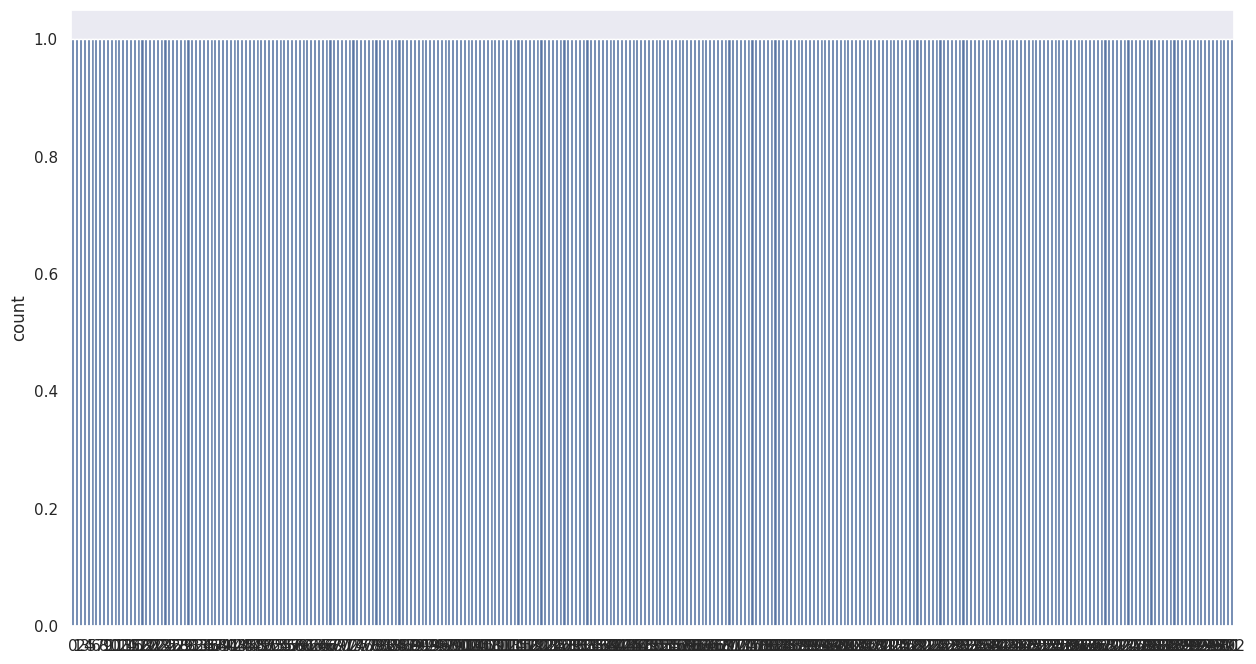

In [117]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [118]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [119]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

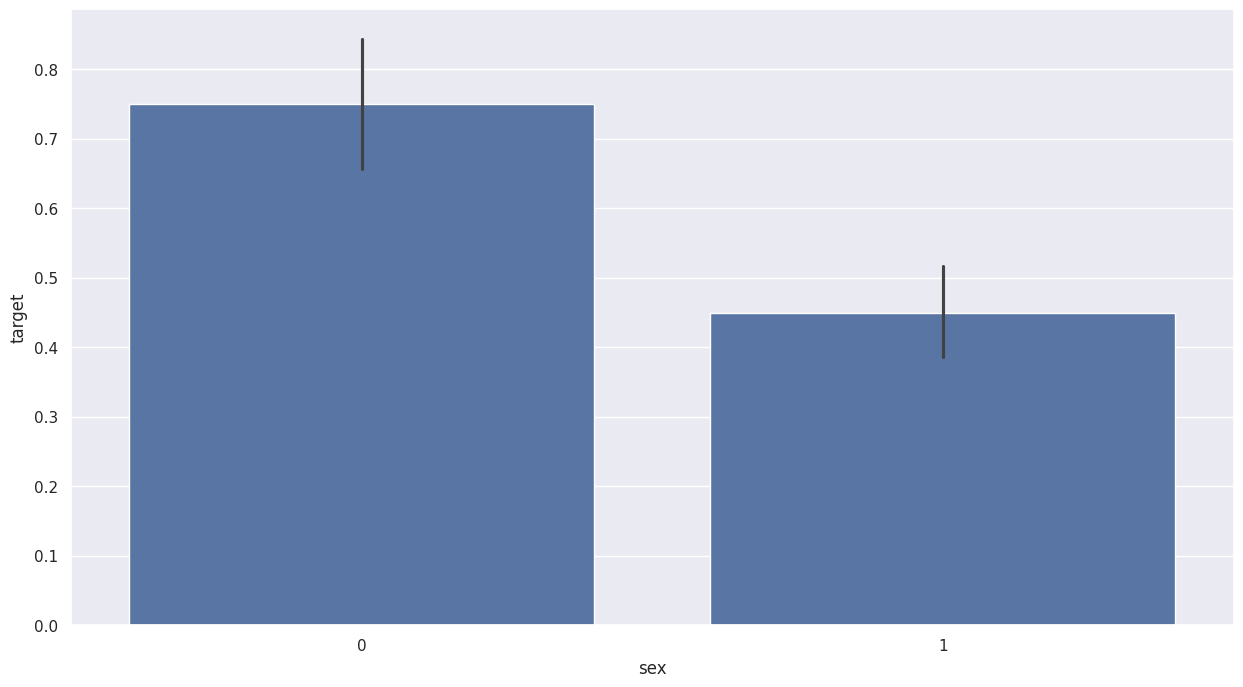

In [120]:
sns.barplot(x=dataset["sex"], y=y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [121]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

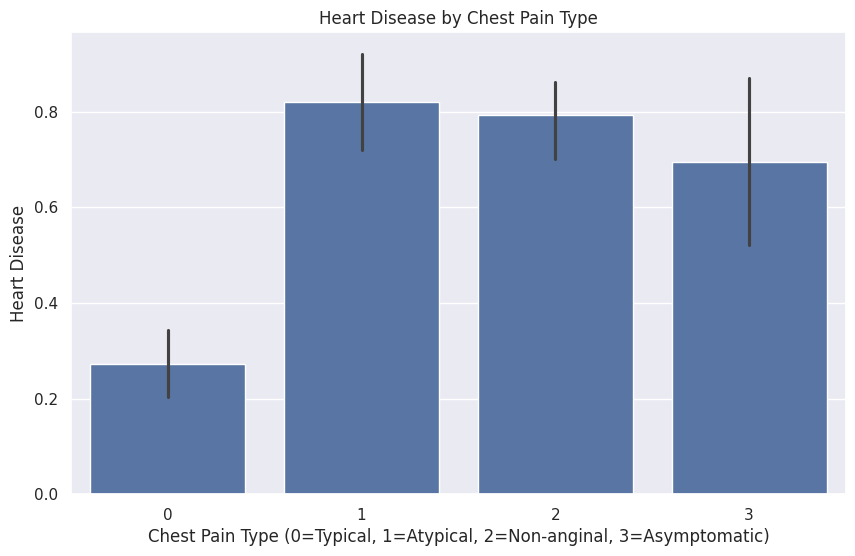

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset["cp"], y=y)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)")
plt.ylabel("Heart Disease")
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [123]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [124]:
dataset["fbs"].unique()

array([1, 0])

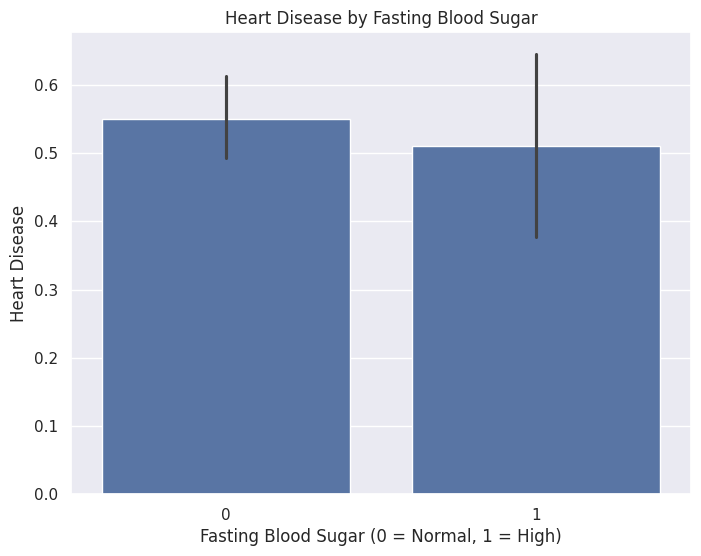

In [125]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["fbs"], y=y)
plt.title("Heart Disease by Fasting Blood Sugar")
plt.xlabel("Fasting Blood Sugar (0 = Normal, 1 = High)")
plt.ylabel("Heart Disease")
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [126]:
dataset["restecg"].unique()

array([0, 1, 2])

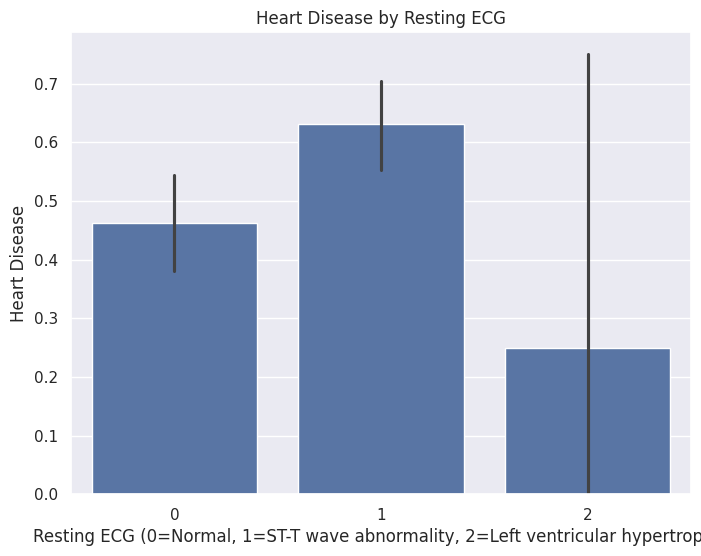

In [127]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["restecg"], y=y)
plt.title("Heart Disease by Resting ECG")
plt.xlabel("Resting ECG (0=Normal, 1=ST-T wave abnormality, 2=Left ventricular hypertrophy)")
plt.ylabel("Heart Disease")
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [128]:
dataset["exang"].unique()

array([0, 1])

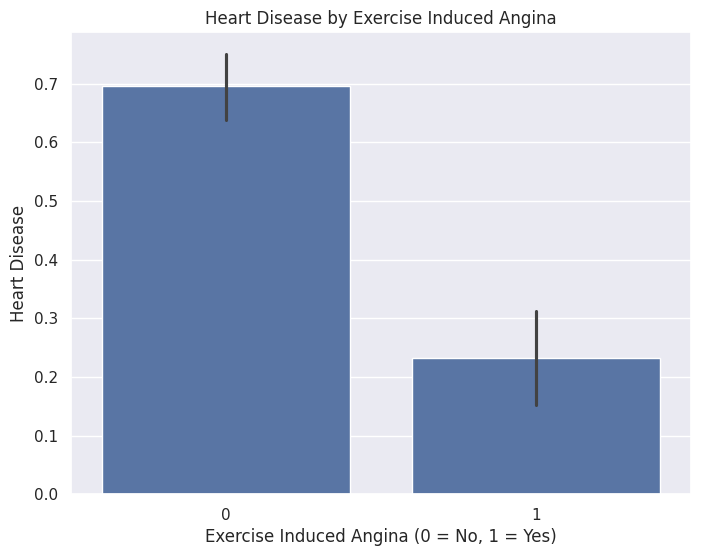

In [129]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["exang"], y=y)
plt.title("Heart Disease by Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Heart Disease")
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [130]:
dataset["slope"].unique()

array([0, 2, 1])

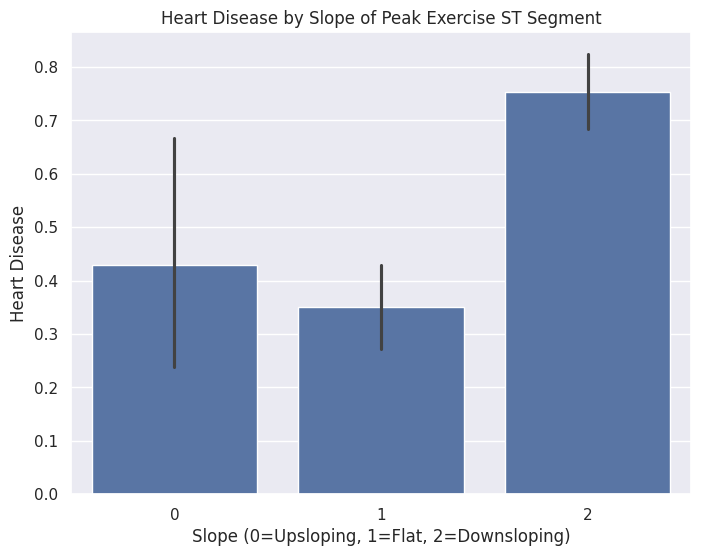

In [131]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["slope"], y=y)
plt.title("Heart Disease by Slope of Peak Exercise ST Segment")
plt.xlabel("Slope (0=Upsloping, 1=Flat, 2=Downsloping)")
plt.ylabel("Heart Disease")
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [132]:
#number of major vessels (0-3) colored by flourosopy

In [133]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

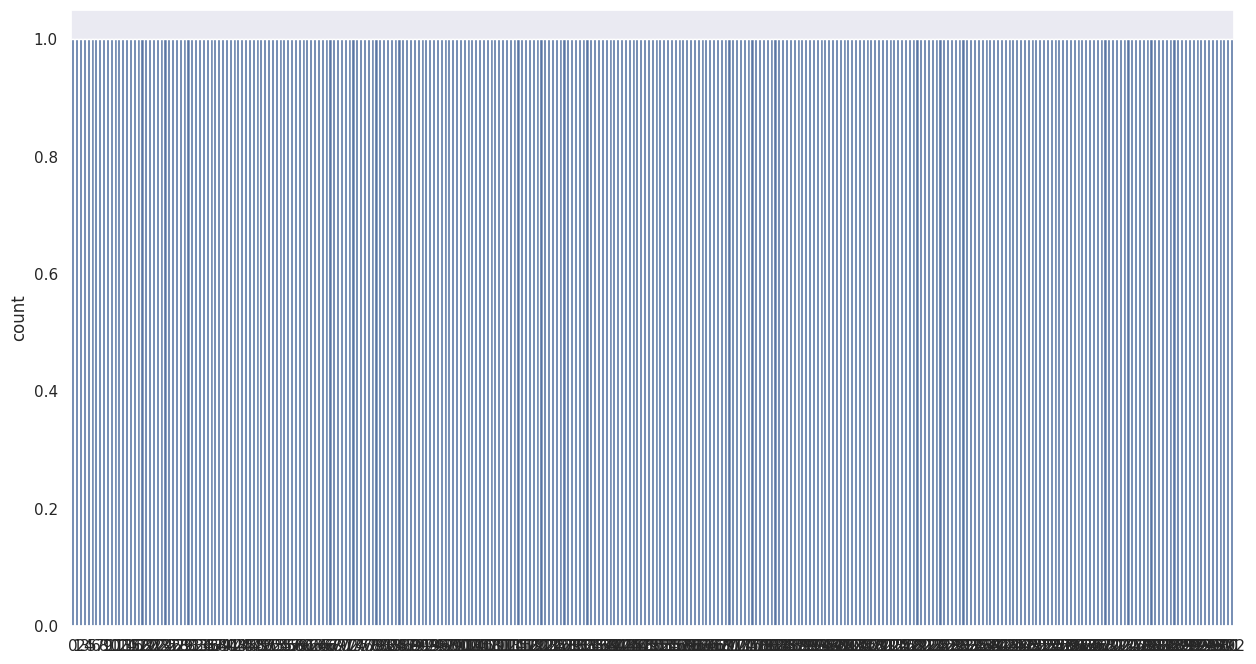

In [134]:
sns.countplot(dataset["ca"])

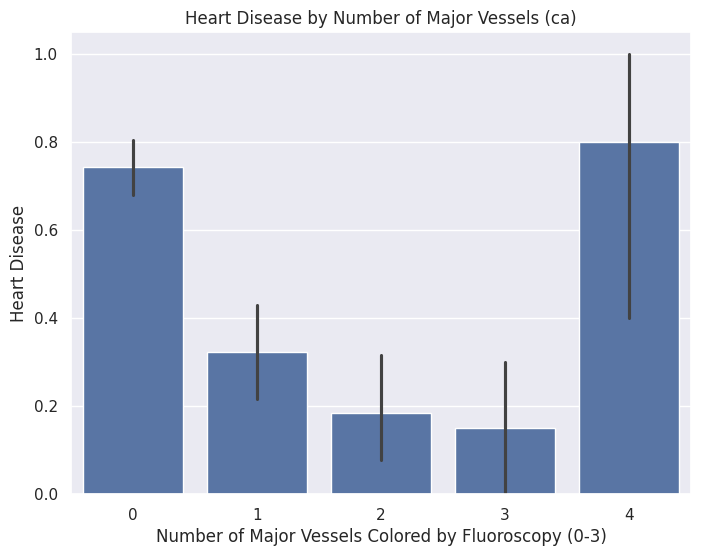

In [135]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["ca"], y=y)
plt.title("Heart Disease by Number of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (0-3)")
plt.ylabel("Heart Disease")
plt.show()

##### ca=4 has astonishingly large number of heart patients

In [136]:
### Analysing the 'thal' feature

In [137]:
dataset["thal"].unique()

array([1, 2, 3, 0])

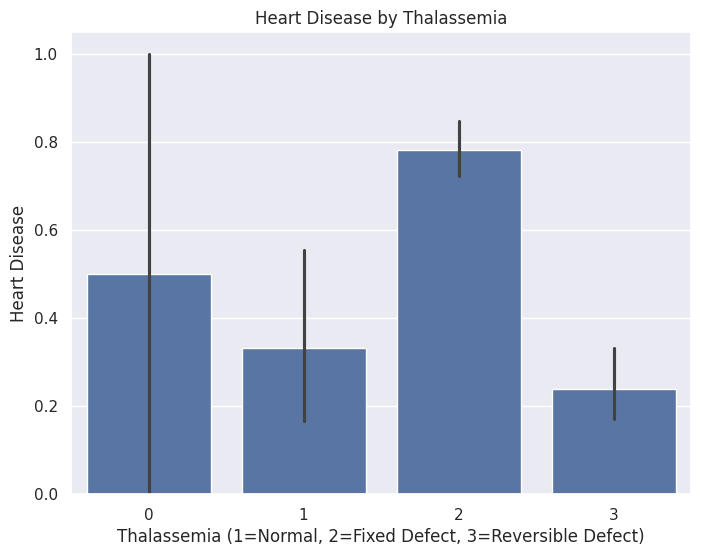

In [138]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset["thal"], y=y)
plt.title("Heart Disease by Thalassemia")
plt.xlabel("Thalassemia (1=Normal, 2=Fixed Defect, 3=Reversible Defect)")
plt.ylabel("Heart Disease")
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

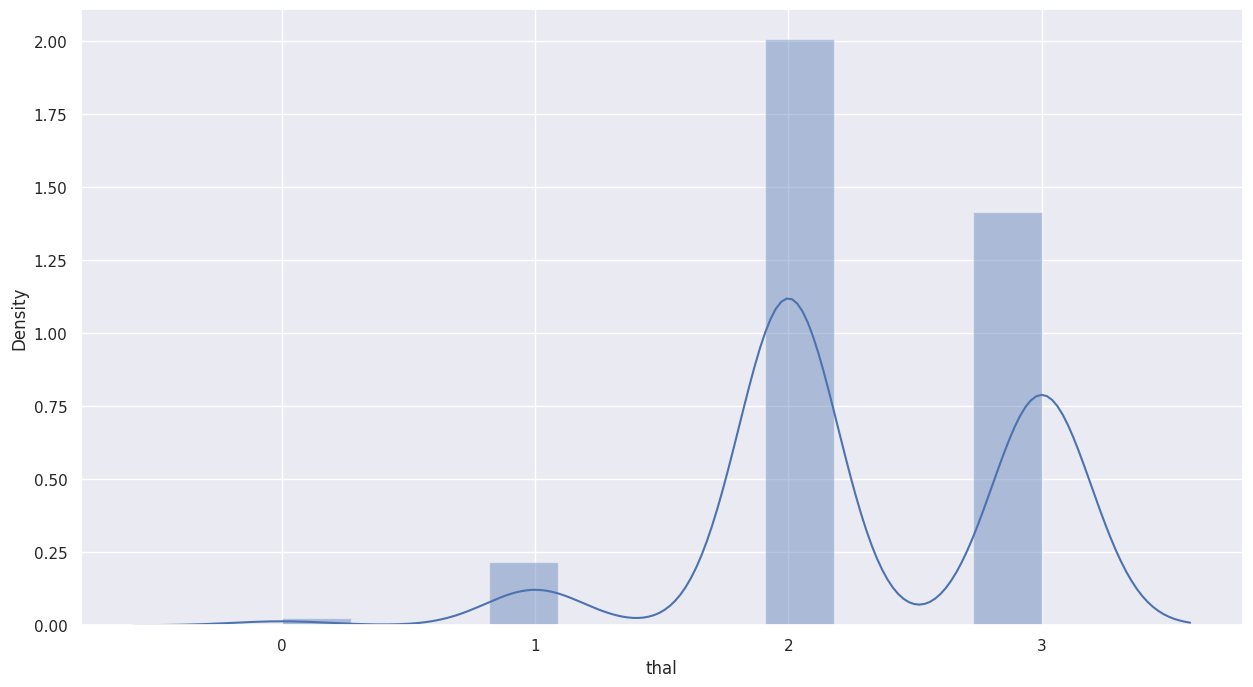

In [139]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [140]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [141]:
X_train.shape

(242, 13)

In [142]:
X_test.shape

(61, 13)

In [143]:
Y_train.shape

(242,)

In [144]:
Y_test.shape

(61,)

## V. Model Fitting

In [145]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Prepare data
X = dataset.drop('target', axis=1)
y = dataset['target']  # Note: small 'y'

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)  # Use scaled data

# 5. Make predictions
Y_pred_lr = lr.predict(X_test_scaled)  # Use scaled data

print("Logistic Regression training completed!")
print(f"Predictions shape: {Y_pred_lr.shape}")

Logistic Regression training completed!
Predictions shape: (61,)


In [147]:
Y_pred_lr.shape

(61,)

In [148]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 49.18 %


### Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [150]:
Y_pred_nb.shape

(61,)

In [151]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 45.9 %


### SVM

In [152]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [153]:
Y_pred_svm.shape

(61,)

In [154]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 47.54 %


### K Nearest Neighbors

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [156]:
Y_pred_knn.shape

(61,)

In [157]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 52.46 %


### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [159]:
print(Y_pred_dt.shape)

(61,)


In [160]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 55.74 %


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = 0

# Use smaller range for testing, then increase if needed
for x in range(100):  # Reduced from 2000 to 100 for testing
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, y_train)  # y_train (small y)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, y_test)*100, 2)  # y_test (small y)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(f"Max Accuracy: {max_accuracy}%")
print(f"Best Random State: {best_x}")

# Train final model with best random state
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)

print("Random Forest training completed!")

Max Accuracy: 88.52%
Best Random State: 28
Random Forest training completed!


In [162]:
Y_pred_rf.shape

(61,)

In [163]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 45.9 %


### XGBoost

In [164]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [165]:
Y_pred_xgb.shape

(61,)

In [166]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 50.82 %


### Neural Network

In [167]:
from keras.models import Sequential
from keras.layers import Dense

In [168]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [169]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5543 - loss: 69.5762  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5689 - loss: 59.3070 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5253 - loss: 56.0123 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5430 - loss: 46.1228 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5552 - loss: 38.6723 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5219 - loss: 33.5771 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5192 - loss: 26.3854 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5317 - loss: 17.8209 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5062 - loss: 11.5090 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5441 - loss: 4.2441 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5242 - loss: 3.0556 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [170]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [171]:
Y_pred_nn.shape

(61, 1)

In [172]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [173]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 54.1 %


## VI. Output final score

In [174]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 49.18 %
The accuracy score achieved using Naive Bayes is: 45.9 %
The accuracy score achieved using Support Vector Machine is: 47.54 %
The accuracy score achieved using K-Nearest Neighbors is: 52.46 %
The accuracy score achieved using Decision Tree is: 55.74 %
The accuracy score achieved using Random Forest is: 45.9 %
The accuracy score achieved using XGBoost is: 50.82 %
The accuracy score achieved using Neural Network is: 54.1 %


In [175]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for different models
lr_accuracy = accuracy_score(y_test, Y_pred_lr) * 100
rf_accuracy = accuracy_score(y_test, Y_pred_rf) * 100

# Create algorithms and scores lists
algorithms = ['Logistic Regression', 'Random Forest']
scores = [lr_accuracy, rf_accuracy]

print("Algorithm Scores:")
for algo, score in zip(algorithms, scores):
    print(f"{algo}: {score:.2f}%")

Algorithm Scores:
Logistic Regression: 85.25%
Random Forest: 88.52%


### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>